# Flexão composta em vigas

$\sigma_x = \frac{N}{A} - \frac{M_z y}{I_z} + \frac{M_y z}{I_y}$ <br>

Onde:<br>
* **N** é a força normal na seção
* **A** é a área da seção
* **$M_z$**, **$M_y$** são os momentos fletores em torno dos eixos z e y, respectivamente
* **$I_z$**, **$I_y$** são os momentos de inércia em torno dos eixos z e y, respectivamente
* **z**, **y** são as coordenadas da superfície da seção transversal

## Seção retangular



DISTRIBUIÇÃO DE TENSÕES DE FLEXÃO EM UMA VIGA DE SEÇÃO I
Momebnto em torno de z:             Mz        = 11.00 kNm
Momebnto em torno de y:             My        = 11.00 kNm
Momento fletor resultante:          M         = 15.56 kNm
Ângulo do momento solicitante:      theta     = 45.00 °
Esforço normal:                     N         = -200.00 kN
Momento de inércia em relação a z:  Iz        = 106666.67 cm4
Momento de inércia em relação a y:  Iy        = 26666.67 cm4
Tensão normal máxima:               sigma_max = 3.69 MPa
Tensão normal mínima:               sigma_min = -8.69 MPa
Inclinação da linha neutra:         alpha     = 79.14 °
-----------------------------------------------------------------



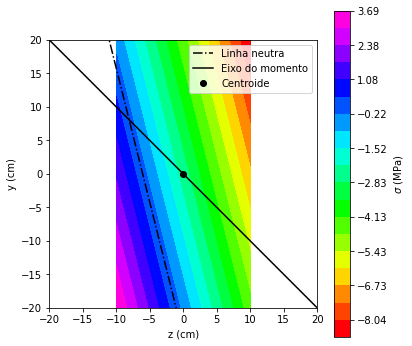

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#----------------------------------------------------
#Entrada de dados
#----------------------------------------------------
b = 20 #cm (largura da base)
h = 40 #cm (altura)
Mz = 11 #kNm (momento em torno de z)
My = 11 #kNm (momento em torno de y)
N = -200 #kN



#----------------------------------------------------
#Propriedade geométrica da seção
#----------------------------------------------------
Iz = b*(h**3)/12
Iy = h*(b**3)/12
A = b*h

#----------------------------------------------------
#Parâmetros adicionais
#----------------------------------------------------
theta = (180/np.pi)*np.arctan(My/Mz) #(inclinação do momento resultante)
M = np.sqrt(Mz**2+My**2)  #momento resultante na seçao

#----------------------------------------------------
#Criação da malha
#----------------------------------------------------
npz = 100
npy = 100
z = np.linspace(-b/2,b/2,npz)
y = np.linspace(-h/2,h/2,npy)
Z, Y = np.meshgrid(z, y)

#----------------------------------------------------
#Cálculo das tensões
#----------------------------------------------------
sigma = 10*(N/A)+10*(-100*Mz*Y/Iz + 100*My*Z/Iy)
sigma_max = np.max(sigma)
sigma_min = np.min(sigma)

faixa = np.linspace(sigma_min, sigma_max, 20)



#----------------------------------------------------
#Vizualização dos resultados
#----------------------------------------------------

#Criação do gráfico
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

# Plotagem do contorno de valores
contour = ax.contourf(-Z, Y, sigma, levels = faixa, cmap = 'gist_rainbow',)

# Adição da barra de cores
cbar = fig.colorbar(contour)
cbar.set_label('$\sigma$ (MPa)')

# Definição dos limites do gráfico
lim_min = -max(b, h)/2
lim_max = max(b, h)/2
ax.set_xlim(lim_min, lim_max)
ax.set_ylim(lim_min, lim_max)
ax.set_xlabel('z (cm)')
ax.set_ylabel('y (cm)')


#Linha neutra
z = np.linspace(lim_min, lim_max, 10)
y = (Iz/(100*Mz))*(N/A + (100*My*z)/Iy)
LN = ax.plot(-z,y,
    'k-.', label='Linha neutra'
)
alpha = (180/np.pi)*np.arctan(y[0]/z[0])


#Eixo de atuação do momento fletor
z = np.linspace(lim_min, lim_max, 10)
y = -np.tan((np.pi/180)*theta)*z
EM = ax.plot(z,y,
    'k-', label='Eixo do momento'
)

#Centroide da seção
CG = ax.plot(0,0,
    'ko', label='Centroide'
)

#Legenda
ax.legend()


# Apresentação dos dados
print('')
print('')
print('=================================================================')
print('DISTRIBUIÇÃO DE TENSÕES DE FLEXÃO EM UMA VIGA DE SEÇÃO I')
print('=================================================================')
print('Momebnto em torno de z:             Mz        = %.2f kNm' % Mz)
print('Momebnto em torno de y:             My        = %.2f kNm' % My)
print('Momento fletor resultante:          M         = %.2f kNm' % M)
print('Ângulo do momento solicitante:      theta     = %.2f °' % theta)
print('Esforço normal:                     N         = %.2f kN' % N)
print('Momento de inércia em relação a z:  Iz        = %.2f cm4' % Iz)
print('Momento de inércia em relação a y:  Iy        = %.2f cm4' % Iy)
print('Tensão normal máxima:               sigma_max = %.2f MPa' % sigma_max)
print('Tensão normal mínima:               sigma_min = %.2f MPa' % sigma_min)
print('Inclinação da linha neutra:         alpha     = %.2f °' % alpha)
print('-----------------------------------------------------------------')
print('')
plt.show()


## Seção I



DISTRIBUIÇÃO DE TENSÕES DE FLEXÃO EM UMA VIGA DE SEÇÃO RETANGULAR
Momebnto em torno de z:             Mz        = 10.96 kNm
Momebnto em torno de y:             My        = 0.96 kNm
Momento fletor resultante:          M         = 11.00 kNm
Ângulo do momento solicitante:      theta     = 5.00 °
Esforço normal:                     N         = -25.00 kN
Momento de inércia em relação a z:  Iz        = 32794.67 cm4
Momento de inércia em relação a y:  Iy        = 2669.67 cm4
Tensão normal máxima:               sigma_max = 8.12 MPa
Tensão normal mínima:               sigma_min = -12.43 MPa
Inclinação da linha neutra:         alpha     = 54.41 °
-----------------------------------------------------------------



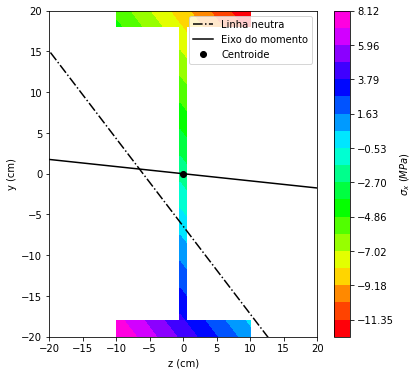

In [63]:
import numpy as np
import matplotlib.pyplot as plt

#----------------------------------------------------
#Entrada de dados
#----------------------------------------------------
bf = 20
d = 40
tw = 1
tf = 2
M = 11 #kNm
theta = 5 #°
N = -25 #kN


#----------------------------------------------------
#Propriedade geométrica da seção
#----------------------------------------------------

#Área
A = 2*bf*tf + tw*(d-2*tf)

#centroide
def centroide_I():
    zc=bf/2
    yc=d/2
    return zc, yc

zc = centroide_I()[0]
yc = centroide_I()[1]

#momento de inércia
def inercia_I(d, bf, tw, tf, zc, yc):
    A1=bf*tf
    dz1=0
    dy1=d/2-tf/2
    Iz1=(bf*tf**3)/12+A1*dy1**2
    Iy1=(tf*bf**3)/12+A1*dz1**2
    A2=tw*(d-2*tf)
    dz2=0
    dy2=0
    Iz2=(tw*(d-2*tf)**3)/12+A2*dy2**2
    Iy2=((d-2*tf)*tw**3)/12+A2*dz2**2
    Iz3=Iz1
    Iy3=Iy1     
    Iz=Iz1+Iz2+Iz3
    Iy=Iy1+Iy2+Iy3
    return Iz, Iy

Iz=inercia_I(d, bf, tw, tf, zc, yc)[0]
Iy=inercia_I(d, bf, tw, tf, zc, yc)[1]

#Inclinação da linha neutra
alpha = -(180/np.pi)*np.arctan((Iz/Iy)*np.tan(theta))


#----------------------------------------------------
#Componentes do momento fletor
#----------------------------------------------------
Mz = M*np.cos((np.pi/180)*(theta))
My = M*np.sin((np.pi/180)*(theta))


#----------------------------------------------------
#Cálculo das tensões
#----------------------------------------------------


# mesa superior
A1 = bf*tf
z1 = np.linspace(-zc, zc, 100)
y1 = np.linspace(d/2-tf, d/2, 100)
Z1, Y1 = np.meshgrid(z1, y1)
sigma1 = 10*(N/A)+10*(-100*Mz*Y1/Iz + 100*My*Z1/Iy)  # Example function, modify as per your requirement



# alma
A2 = tw*(d-2*tf)
z2 = np.linspace(-tw/2, tw/2, 100)
y2 = np.linspace(-(d/2-tf), (d/2-tf), 100)
Z2, Y2 = np.meshgrid(z2, y2)
sigma2 = 10*(N/A)+10*(-100*Mz*Y2/Iz + 100*My*Z2/Iy)  # Example function, modify as per your requirement


# mesa inferior
A3=A1
z3 = np.linspace(-zc, zc, 100)
y3 = np.linspace(-(d/2), -(d/2-tf), 100)
Z3, Y3 = np.meshgrid(z3, y3)
sigma3 = 10*(N/A)+10*(-100*Mz*Y3/Iz + 100*My*Z3/Iy)  # Example function, modify as per your requirement


#mesclagem das arrays de resultados
sigma = np.concatenate((sigma1, sigma2, sigma3))
sigma_max = np.nanmax(sigma)
sigma_min = np.nanmin(sigma)
faixa = np.linspace(sigma_min, sigma_max, 20)


#----------------------------------------------------
#Vizualização dos resultados
#----------------------------------------------------

#Criação do gráfico
fig, ax = plt.subplots(figsize=(6, 6))

# Plotagem do contorno de valores

contour = ax.contourf(-Z1, Y1, sigma1, levels = faixa, cmap='gist_rainbow')
contour = ax.contourf(-Z2, Y2, sigma2, levels = faixa, cmap='gist_rainbow')
contour = ax.contourf(-Z3, Y3, sigma3, levels = faixa, cmap='gist_rainbow')

# Adição da barra de cores
cbar = fig.colorbar(contour)
cbar.set_label('$\sigma_x\ (MPa)$')

# Definição dos limites do gráfico
lim_min = -max(bf, d)/2
lim_max = max(bf, d)/2
ax.set_xlim(lim_min, lim_max)
ax.set_ylim(lim_min, lim_max)
ax.set_xlabel('z (cm)')
ax.set_ylabel('y (cm)')

#Linha neutra
z = np.linspace(lim_min, lim_max, 10)
y = (Iz/(100*Mz))*(N/A + (100*My*z)/Iy)
LN = ax.plot(-z,y,
    'k-.', label='Linha neutra'
)
alpha = (180/np.pi)*np.arctan(y[0]/z[0])


#Eixo de atuação do momento fletor
z = np.linspace(lim_min, lim_max, 10)
y = -np.tan((np.pi/180)*theta)*z
EM = ax.plot(z,y,
    'k-', label='Eixo do momento'
)

#Centroide da seção
CG = ax.plot(0,0,
    'ko', label='Centroide'
)



#Legenda
ax.legend()

# Apresentação dos dados
print('')
print('')
print('=================================================================')
print('DISTRIBUIÇÃO DE TENSÕES DE FLEXÃO EM UMA VIGA DE SEÇÃO RETANGULAR')
print('=================================================================')
print('Momebnto em torno de z:             Mz        = %.2f kNm' % Mz)
print('Momebnto em torno de y:             My        = %.2f kNm' % My)
print('Momento fletor resultante:          M         = %.2f kNm' % M)
print('Ângulo do momento solicitante:      theta     = %.2f °' % theta)
print('Esforço normal:                     N         = %.2f kN' % N)
print('Momento de inércia em relação a z:  Iz        = %.2f cm4' % Iz)
print('Momento de inércia em relação a y:  Iy        = %.2f cm4' % Iy)
print('Tensão normal máxima:               sigma_max = %.2f MPa' % sigma_max)
print('Tensão normal mínima:               sigma_min = %.2f MPa' % sigma_min)
print('Inclinação da linha neutra:         alpha     = %.2f °' % alpha)
print('-----------------------------------------------------------------')
print('')

plt.show()
